In [2]:
def make_color_wheel():
    """
    Generate color wheel according Middlebury color code
    :return: Color wheel
    """
    RY = 15
    YG = 6
    GC = 4
    CB = 11
    BM = 13
    MR = 6

    ncols = RY + YG + GC + CB + BM + MR

    colorwheel = np.zeros([ncols, 3])

    col = 0

    # RY
    colorwheel[0:RY, 0] = 255
    colorwheel[0:RY, 1] = np.transpose(np.floor(255*np.arange(0, RY) / RY))
    col += RY

    # YG
    colorwheel[col:col+YG, 0] = 255 - np.transpose(np.floor(255*np.arange(0, YG) / YG))
    colorwheel[col:col+YG, 1] = 255
    col += YG

    # GC
    colorwheel[col:col+GC, 1] = 255
    colorwheel[col:col+GC, 2] = np.transpose(np.floor(255*np.arange(0, GC) / GC))
    col += GC

    # CB
    colorwheel[col:col+CB, 1] = 255 - np.transpose(np.floor(255*np.arange(0, CB) / CB))
    colorwheel[col:col+CB, 2] = 255
    col += CB

    # BM
    colorwheel[col:col+BM, 2] = 255
    colorwheel[col:col+BM, 0] = np.transpose(np.floor(255*np.arange(0, BM) / BM))
    col += + BM

    # MR
    colorwheel[col:col+MR, 2] = 255 - np.transpose(np.floor(255 * np.arange(0, MR) / MR))
    colorwheel[col:col+MR, 0] = 255

    return colorwheel

def compute_color(u, v):
    """
    compute optical flow color map
    :param u: optical flow horizontal map
    :param v: optical flow vertical map
    :return: optical flow in color code
    """
    [h, w] = u.shape
    img = np.zeros([h, w, 3])
    nanIdx = np.isnan(u) | np.isnan(v)
    u[nanIdx] = 0
    v[nanIdx] = 0

    colorwheel = make_color_wheel()
    ncols = np.size(colorwheel, 0)

    rad = np.sqrt(u**2+v**2)

    a = np.arctan2(-v, -u) / np.pi

    fk = (a+1) / 2 * (ncols - 1) + 1

    k0 = np.floor(fk).astype(int)

    k1 = k0 + 1
    k1[k1 == ncols+1] = 1
    f = fk - k0

    for i in range(0, np.size(colorwheel,1)):
        tmp = colorwheel[:, i]
        col0 = tmp[k0-1] / 255
        col1 = tmp[k1-1] / 255
        col = (1-f) * col0 + f * col1

        idx = rad <= 1
        col[idx] = 1-rad[idx]*(1-col[idx])
        notidx = np.logical_not(idx)

        col[notidx] *= 0.75
        img[:, :, i] = np.uint8(np.floor(255 * col*(1-nanIdx)))

    return img

def flow_to_image(flow):
    """
    Convert flow into middlebury color code image
    :param flow: optical flow map
    :return: optical flow image in middlebury color
    """
    u = flow[:, :, 0]
    v = flow[:, :, 1]

    maxu = -999.
    maxv = -999.
    minu = 999.
    minv = 999.
    UNKNOWN_FLOW_THRESH = 1e7
    SMALLFLOW = 0.0
    LARGEFLOW = 1e8

    idxUnknow = (abs(u) > UNKNOWN_FLOW_THRESH) | (abs(v) > UNKNOWN_FLOW_THRESH)
    u[idxUnknow] = 0
    v[idxUnknow] = 0

    maxu = max(maxu, np.max(u))
    minu = min(minu, np.min(u))

    maxv = max(maxv, np.max(v))
    minv = min(minv, np.min(v))

    rad = np.sqrt(u ** 2 + v ** 2)
    maxrad = max(-1, np.max(rad))

    u = u/(maxrad + np.finfo(float).eps)
    v = v/(maxrad + np.finfo(float).eps)

    img = compute_color(u, v)

    idx = np.repeat(idxUnknow[:, :, np.newaxis], 3, axis=2)
    img[idx] = 0

    return np.uint8(img)




In [4]:
import numpy as np
q=np.load("E:/JupyterWorkspace/opticalflow/save/fake/test.npy")
print(q)

[[[ 3.9726190e-04  5.0399358e-05]
  [-2.6187443e-04 -5.2737736e-04]
  [ 1.3605711e-03 -8.2784647e-04]
  ...
  [ 2.0863756e-03 -1.3184894e-03]
  [ 3.0969130e-04  1.2479603e-04]
  [ 5.0126189e-05  4.7046566e-04]]

 [[-4.5486793e-04  9.9363457e-04]
  [-1.1885281e-03  4.5393285e-04]
  [ 5.5211736e-04  3.5470148e-04]
  ...
  [ 2.0134614e-03 -2.1666230e-03]
  [ 1.9898324e-04 -1.6444302e-04]
  [-7.4058982e-05  4.1347445e-04]]

 [[-9.1797119e-04  1.5242905e-03]
  [-1.9721850e-03  9.7852934e-04]
  [ 3.7981922e-06  9.2503952e-04]
  ...
  [ 1.7091815e-03 -3.8943375e-03]
  [ 2.9069038e-06 -6.6302856e-04]
  [-2.3748973e-04  2.8942109e-04]]

 ...

 [[-4.2270880e-02  9.4507337e-03]
  [-5.4382086e-02 -4.7270544e-03]
  [-9.5482923e-02 -3.2498613e-02]
  ...
  [ 5.4188631e-04 -7.0105903e-02]
  [ 5.3895097e-03 -5.7762820e-02]
  [-1.1792589e-03 -4.7133148e-02]]

 [[-2.2769498e-02  1.6546723e-02]
  [-3.7411146e-02  3.1026886e-03]
  [-7.6375321e-02 -2.3777302e-02]
  ...
  [-4.7844993e-03 -4.6281759e-02]
  [ 

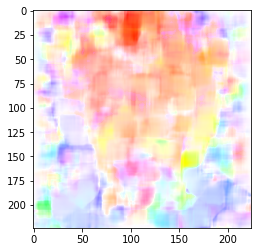

In [7]:
import matplotlib as plt
img = flow_to_image(q)
plt.imshow(img)
plt.show()